### Import Libraries

In [1]:
#IMPORT LIBRARIES

import pandas as pd  # library used for data science/data analysis and machine learning tasks
import numpy as np  # library used for working with arrays, math functions, linear algebra, fourier transform, matrices, and others.
import seaborn as sns  # library for making statistical graphics in Python.
import matplotlib.pyplot as plt  # library for plot visualizations

# command for drawing  plots immediately after the current cell (show more than only one graph)
%matplotlib inline 

import os  # used here to access filedir functions
import datetime  # functions for manipulating date
import random  # functions for generating or manipulating random integers

#from scipy.stats import poisson  # Statistic poisson library

# Scikit-learn is a machine learning library. Contains functions for regression, classification and clustering algorithms.
#from sklearn import linear_model
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import r2_score

# Remove Warnings 
import warnings
warnings.filterwarnings('ignore')

# print the entire dataframe
pd.set_option('display.max_rows', None)

.

# Data Undersanding

### House Construction Cost

In [2]:
#Ireland_Construction_Cost_Index_HSA09.20230502094108.csv - INDEX = Jan/1991
#Germany_Construction_Cost_Index_OPCNRE01DEQ661N.csv      - INDEX = 2015
#Italy_Construction_Cost_Index_OPCNRE01ITM661N.csv        - INDEX = 2015

#opening datasets with construction cost values
df_Ireland_Construction_Cost = pd.read_csv('Ireland_Construction_Cost_Index_HSA09.20230502094114.csv') 
df_Germany_Construction_Cost = pd.read_csv("Germany_Construction_Cost_Index_OPCNRE01DEQ661N.csv");
df_Italy_Construction_Cost = pd.read_csv("Italy_Construction_Cost_Index_OPCNRE01ITM661N.csv");


In [3]:
df_Ireland_Construction_Cost

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02196V02652,State,UNIT,VALUE
0,HSA09,House Construction Cost Index,1975,1975,-,State,Base Jan 1991=100,20.0
1,HSA09,House Construction Cost Index,1976,1976,-,State,Base Jan 1991=100,22.9
2,HSA09,House Construction Cost Index,1977,1977,-,State,Base Jan 1991=100,26.9
3,HSA09,House Construction Cost Index,1978,1978,-,State,Base Jan 1991=100,29.6
4,HSA09,House Construction Cost Index,1979,1979,-,State,Base Jan 1991=100,34.2
5,HSA09,House Construction Cost Index,1980,1980,-,State,Base Jan 1991=100,42.3
6,HSA09,House Construction Cost Index,1981,1981,-,State,Base Jan 1991=100,50.4
7,HSA09,House Construction Cost Index,1982,1982,-,State,Base Jan 1991=100,57.4
8,HSA09,House Construction Cost Index,1983,1983,-,State,Base Jan 1991=100,62.2
9,HSA09,House Construction Cost Index,1984,1984,-,State,Base Jan 1991=100,68.4


In [4]:
df_Germany_Construction_Cost

,DATE,OPCNRE01DEQ661N
0,1960-01-01,13.6
1,1960-04-01,14.0
2,1960-07-01,14.2
3,1960-10-01,14.3
4,1961-01-01,14.6
5,1961-04-01,14.7
6,1961-07-01,15.5
7,1961-10-01,15.8
8,1962-01-01,15.9
9,1962-04-01,16.4


In [5]:
df_Italy_Construction_Cost

,DATE,OPCNRE01ITM661N
0,1967-01-01,3.132876
1,1967-02-01,3.142001
2,1967-03-01,3.142001
3,1967-04-01,3.145042
4,1967-05-01,3.148084
5,1967-06-01,3.151126
6,1967-07-01,3.151126
7,1967-08-01,3.163292
8,1967-09-01,3.160251
9,1967-10-01,3.160251


### Total Construction

In [6]:
#Ireland_Construction_Total_Construction_Quarter_PRCNTO01IEQ659S.csv  - INDEX = Growth rate same period previous year
#Germany_Construction_Total_Construction_Monthly_DEUPROCONMISMEI.csv  - INDEX = 2015
#Italy_Construction_Total_Construction_Quarter_ITAPROCONQISMEI.csv    - INDEX = 2015

#opening datasets with construction Total values
df_Ireland_Construction_Total = pd.read_csv('Ireland_Construction_Total_Construction_Quarter_PRCNTO01IEQ659S.csv') 
df_Germany_Construction_Total = pd.read_csv("Germany_Construction_Total_Construction_Monthly_DEUPROCONMISMEI.csv");
df_Italy_Construction_Total = pd.read_csv("Italy_Construction_Total_Construction_Quarter_ITAPROCONQISMEI.csv");

In [7]:
df_Ireland_Construction_Total

,DATE,PRCNTO01IEQ659S
0,2001-01-01,5.204819
1,2001-04-01,4.170528
2,2001-07-01,-2.572062
3,2001-10-01,3.888381
4,2002-01-01,3.664682
5,2002-04-01,-1.868327
6,2002-07-01,3.959945
7,2002-10-01,2.421841
8,2003-01-01,4.021211
9,2003-04-01,5.802357


In [8]:
df_Germany_Construction_Total

,DATE,DEUPROCONMISMEI
0,1962-01-01,77.479509
1,1962-02-01,73.204260
2,1962-03-01,71.104138
3,1962-04-01,66.378863
4,1962-05-01,68.628994
5,1962-06-01,68.403981
6,1962-07-01,68.028959
7,1962-08-01,69.379037
8,1962-09-01,68.779002
9,1962-10-01,67.653937


In [9]:
df_Italy_Construction_Total

,DATE,ITAPROCONQISMEI
0,1995-01-01,111.500000
1,1995-04-01,112.366667
2,1995-07-01,115.033333
3,1995-10-01,121.933333
4,1996-01-01,110.666667
5,1996-04-01,115.533333
6,1996-07-01,114.933333
7,1996-10-01,111.266667
8,1997-01-01,113.266667
9,1997-04-01,114.066667


### Construction Employment

In [10]:
#Ireland_Construction_Employment_LFEACNTTIEQ647S.csv
#Germany_Construction_Employment_LFEACNTTDEQ647S.csv
#Italy_Construction_Employment_LFEACNTTITQ647S.csv

#opening datasets with construction employment values
df_Ireland_Construction_Employment = pd.read_csv('Ireland_Construction_Employment_LFEACNTTIEQ647S.csv') 
df_Germany_Construction_Employment = pd.read_csv("Germany_Construction_Employment_LFEACNTTDEQ647S.csv");
df_Italy_Construction_Employment = pd.read_csv("Italy_Construction_Employment_LFEACNTTITQ647S.csv");

In [11]:
df_Ireland_Construction_Employment

,DATE,LFEACNTTIEQ647S
0,1998-04-01,126229.425842
1,1998-07-01,128836.901138
2,1998-10-01,132480.413852
3,1999-01-01,137135.455495
4,1999-04-01,142543.398618
5,1999-07-01,149077.695777
6,1999-10-01,154899.815880
7,2000-01-01,160950.384905
8,2000-04-01,167492.833627
9,2000-07-01,172838.054867


In [12]:
df_Germany_Construction_Employment

,DATE,LFEACNTTDEQ647S
0,2005-01-01,2.344554e+06
1,2005-04-01,2.415815e+06
2,2005-07-01,2.378816e+06
3,2005-10-01,2.443815e+06
4,2006-01-01,2.374848e+06
5,2006-04-01,2.427666e+06
6,2006-07-01,2.485829e+06
7,2006-10-01,2.491256e+06
8,2007-01-01,2.522118e+06
9,2007-04-01,2.546418e+06


In [13]:
df_Italy_Construction_Employment

,DATE,LFEACNTTITQ647S
0,1998-01-01,1.542675e+06
1,1998-04-01,1.539075e+06
2,1998-07-01,1.541535e+06
3,1998-10-01,1.552514e+06
4,1999-01-01,1.551610e+06
5,1999-04-01,1.576848e+06
6,1999-07-01,1.580542e+06
7,1999-10-01,1.592200e+06
8,2000-01-01,1.596289e+06
9,2000-04-01,1.604301e+06


# Data Preparation

.

## House Construction Cost

.

In [14]:
# Default values to House Construction Cost
# INDEX = 1975 
# Range = 1975 to 2016
# Period = years

### Ireland Construction Cost

In [15]:
#IRELAND HOUSE CONSTRUCTION COST

df_Ireland_Construction_Cost = pd.read_csv('Ireland_Construction_Cost_Index_HSA09.20230502094114.csv') 

#Removing the uselles collumns from our datset
df_Ireland_Construction_Cost = df_Ireland_Construction_Cost.drop('STATISTIC', axis=1)
df_Ireland_Construction_Cost = df_Ireland_Construction_Cost.drop('STATISTIC Label', axis=1)
df_Ireland_Construction_Cost = df_Ireland_Construction_Cost.drop('TLIST(A1)', axis=1)
df_Ireland_Construction_Cost = df_Ireland_Construction_Cost.drop('C02196V02652', axis=1)
df_Ireland_Construction_Cost = df_Ireland_Construction_Cost.drop('UNIT', axis=1)
df_Ireland_Construction_Cost = df_Ireland_Construction_Cost.drop('State', axis=1)

#Rename Colloumn as a main value
df_Ireland_Construction_Cost = df_Ireland_Construction_Cost.rename({'VALUE': 'Ireland_Construction_Cost'}, axis=1)

#Recalc the index to be 1975 instead 1991

#Setting a new variable to store the old first value, it will be used to calculate new porcentages to others values 
firstValue = float(0)

#Iterate on our dataset to change all the values with the new porcentages
for i, row in df_Ireland_Construction_Cost.iterrows():
    if int(row['Year']) == 1975: #set the value of 100 (new index) and capture the old first value
        firstValue = float(row['Ireland_Construction_Cost'])
        df_Ireland_Construction_Cost.at[i,'Ireland_Construction_Cost'] = 100
    else:
        #calculating the new percentage based on a new base index in 1975 = 100
        newValue = float(row['Ireland_Construction_Cost']) * 100 / firstValue
        df_Ireland_Construction_Cost.at[i,'Ireland_Construction_Cost'] = newValue

# Reset Index to equalize after the drops
df_Ireland_Construction_Cost.reset_index(drop=True, inplace=True) 
 
#Convert Year to Int type
df_Ireland_Construction_Cost['Year'] = df_Ireland_Construction_Cost['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Ireland_Construction_Cost['Ireland_Construction_Cost'] = round(df_Ireland_Construction_Cost['Ireland_Construction_Cost'], 0).astype(float);


In [16]:
df_Ireland_Construction_Cost

,Year,Ireland_Construction_Cost
0,1975,100.0
1,1976,114.0
2,1977,134.0
3,1978,148.0
4,1979,171.0
5,1980,212.0
6,1981,252.0
7,1982,287.0
8,1983,311.0
9,1984,342.0


### Germany Construction Cost

In [17]:
#GERMANY HOUSE CONSTRUCTION COST

df_Germany_Construction_Cost = pd.read_csv("Germany_Construction_Cost_Index_OPCNRE01DEQ661N.csv");

#Remove the different years from 1975 to 2016:
#Iterate on our dataset to change all the values with the new porcentages
for i, row in df_Germany_Construction_Cost.iterrows():
    df_Germany_Construction_Cost.at[i,'Year'] = df_Germany_Construction_Cost.at[i,'DATE'][0:4]
    df_Germany_Construction_Cost.at[i,'Month'] = df_Germany_Construction_Cost.at[i,'DATE'][5:7]
    if int(df_Germany_Construction_Cost.at[i,'Year']) < 1975 or int(df_Germany_Construction_Cost.at[i,'Year']) > 2016 or int(df_Germany_Construction_Cost.at[i,'Month']) < 10:
        df_Germany_Construction_Cost.drop(i, inplace=True)

#Removing the uselles collumns from our datset
df_Germany_Construction_Cost = df_Germany_Construction_Cost.drop('DATE', axis=1)
df_Germany_Construction_Cost = df_Germany_Construction_Cost.drop('Month', axis=1)

#Rename Colloumn as a main value
df_Germany_Construction_Cost = df_Germany_Construction_Cost.rename({'OPCNRE01DEQ661N': 'Germany_Construction_Cost'}, axis=1)
df_Germany_Construction_Cost = df_Germany_Construction_Cost.rename({'DATE': 'Year'}, axis = 1)

#Recalc the index to be 1975 instead 2015

#Setting a new variable to store the old first value, it will be used to calculate new porcentages to others values 
firstValue = float(0)

#Iterate on our dataset to change all the values with the new porcentages
for i, row in df_Germany_Construction_Cost.iterrows():
    if int(row['Year']) == 1975: #set the value of 100 (new index) and capture the old first value
        firstValue = float(row['Germany_Construction_Cost'])
        df_Germany_Construction_Cost.at[i,'Germany_Construction_Cost'] = 100
    else:
        #calculating the new percentage based on a new base index in 1975 = 100
        newValue = float(row['Germany_Construction_Cost']) * 100 / firstValue
        df_Germany_Construction_Cost.at[i,'Germany_Construction_Cost'] = newValue

# Reset Index to equalize after the drops
df_Germany_Construction_Cost.reset_index(drop=True, inplace=True)


#Convert Year to Int type
df_Germany_Construction_Cost['Year'] = df_Germany_Construction_Cost['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Germany_Construction_Cost['Germany_Construction_Cost'] = round(df_Germany_Construction_Cost['Germany_Construction_Cost'], 0).astype(float);


In [18]:
df_Germany_Construction_Cost

,Germany_Construction_Cost,Year
0,100.0,1975
1,105.0,1976
2,109.0,1977
3,117.0,1978
4,129.0,1979
5,141.0,1980
6,148.0,1981
7,150.0,1982
8,155.0,1983
9,158.0,1984


### Italy Construction Cost

In [19]:
#ITALY HOUSE CONSTRUCTION COST

df_Italy_Construction_Cost = pd.read_csv("Italy_Construction_Cost_Index_OPCNRE01ITM661N.csv");

#Remove the different years from 1975 to 2016:
#Iterate on our dataset to change all the values with the new porcentages
for i, row in df_Italy_Construction_Cost.iterrows():
    df_Italy_Construction_Cost.at[i,'Year'] = df_Italy_Construction_Cost.at[i,'DATE'][0:4]
    df_Italy_Construction_Cost.at[i,'Month'] = df_Italy_Construction_Cost.at[i,'DATE'][5:7]
    if int(df_Italy_Construction_Cost.at[i,'Year']) < 1975 or int(df_Italy_Construction_Cost.at[i,'Year']) > 2016 or int(df_Italy_Construction_Cost.at[i,'Month']) < 12:
        df_Italy_Construction_Cost.drop(i, inplace=True)

#Removing the uselles collumns from our datset
df_Italy_Construction_Cost = df_Italy_Construction_Cost.drop('DATE', axis=1)
df_Italy_Construction_Cost = df_Italy_Construction_Cost.drop('Month', axis=1)

#Rename Colloumn as a main value
df_Italy_Construction_Cost = df_Italy_Construction_Cost.rename({'OPCNRE01ITM661N': 'Italy_Construction_Cost'}, axis=1)
df_Italy_Construction_Cost = df_Italy_Construction_Cost.rename({'DATE': 'Year'}, axis=1)

#Recalc the index to be 1975 instead 2015

#Setting a new variable to store the old first value, it will be used to calculate new porcentages to others values 
firstValue = float(0)

#Iterate on our dataset to change all the values with the new porcentages
for i, row in df_Italy_Construction_Cost.iterrows():
    if int(row['Year']) == 1975: #set the value of 100 (new index) and capture the old first value
        firstValue = float(row['Italy_Construction_Cost'])
        df_Italy_Construction_Cost.at[i,'Italy_Construction_Cost'] = 100
    else:
        #calculating the new percentage based on a new base index in 1975 = 100
        newValue = float(row['Italy_Construction_Cost']) * 100 / firstValue
        df_Italy_Construction_Cost.at[i,'Italy_Construction_Cost'] = newValue

# Reset Index to equalize after the drops
df_Italy_Construction_Cost.reset_index(drop=True, inplace=True)

#Convert Year to Int type
df_Italy_Construction_Cost['Year'] = df_Italy_Construction_Cost['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Italy_Construction_Cost['Italy_Construction_Cost'] = round(df_Italy_Construction_Cost['Italy_Construction_Cost'], 0).astype(float);



In [20]:
df_Italy_Construction_Cost

,Italy_Construction_Cost,Year
0,100.0,1975
1,127.0,1976
2,146.0,1977
3,169.0,1978
4,210.0,1979
5,260.0,1980
6,314.0,1981
7,363.0,1982
8,405.0,1983
9,432.0,1984


### All Countries Construction Cost

In [21]:
# Now its time to merge the datasets about cost
# 
#df_Ireland_Construction_Cost 
#df_Germany_Construction_Cost 
#df_Italy_Construction_Cost

df1 = pd.DataFrame.merge(df_Ireland_Construction_Cost,df_Germany_Construction_Cost,on='Year')
df_All_Countries_Construction_Cost = pd.DataFrame.merge(df1, df_Italy_Construction_Cost,on='Year')

In [22]:
df_All_Countries_Construction_Cost

,Year,Ireland_Construction_Cost,Germany_Construction_Cost,Italy_Construction_Cost
0,1975,100.0,100.0,100.0
1,1976,114.0,105.0,127.0
2,1977,134.0,109.0,146.0
3,1978,148.0,117.0,169.0
4,1979,171.0,129.0,210.0
5,1980,212.0,141.0,260.0
6,1981,252.0,148.0,314.0
7,1982,287.0,150.0,363.0
8,1983,311.0,155.0,405.0
9,1984,342.0,158.0,432.0


## TOTAL CONSTRUCTION

.

In [23]:
# Default values to Total Construction
# INDEX = 2001 
# Range = 2001 to 2022
# Period = years

#Ireland_Construction_Total_Construction_Quarter_PRCNTO01IEQ659S.csv  - INDEX = Growth rate same period previous year
#Germany_Construction_Total_Construction_Monthly_DEUPROCONMISMEI.csv  - INDEX = 2015
#Italy_Construction_Total_Construction_Quarter_ITAPROCONQISMEI.csv    - INDEX = 2015

#opening datasets with construction Total values
df_Ireland_Construction_Total = pd.read_csv('Ireland_Construction_Total_Construction_Quarter_PRCNTO01IEQ659S.csv') 
df_Germany_Construction_Total = pd.read_csv("Germany_Construction_Total_Construction_Monthly_DEUPROCONMISMEI.csv");
df_Italy_Construction_Total = pd.read_csv("Italy_Construction_Total_Construction_Quarter_ITAPROCONQISMEI.csv");

### Ireland Total Construction

In [24]:
#IRELAND TOTAL CONSTRUCTION

df_Ireland_Construction_Total = pd.read_csv('Ireland_Construction_Total_Construction.csv') 

#Iterate with the dataset to create independent columns year and month based on DATE column
for i, row in df_Ireland_Construction_Total.iterrows():
    df_Ireland_Construction_Total.at[i,'Year'] = df_Ireland_Construction_Total.at[i,'DATE'][0:4]
    df_Ireland_Construction_Total.at[i,'Month'] = df_Ireland_Construction_Total.at[i,'DATE'][5:7]    
    
#Rename column as a main value
df_Ireland_Construction_Total = df_Ireland_Construction_Total.rename({'PRCNTO01IEQ657S': 'Ireland_Construction_Total'}, axis=1)
df_Ireland_Construction_Total = df_Ireland_Construction_Total.rename({'DATE': 'Date'}, axis=1)

#Setting a new variable to store the old first value, it will be used to calculate new porcentages to others values 
previousValue = float(0)

#Iterate on our dataset to change all the values with the new porcentages
for i, row in df_Ireland_Construction_Total.iterrows():
    if int(row['Year']) == 2001: #set the value of 100 (new index) and capture the old first value
        previousValue = float(100)
        df_Ireland_Construction_Total.at[i,'Ireland_Construction_Total'] = 100
    else:
        #calculating the new percentage based on a new base index in 2001 = 100
        newValue = (float(row['Ireland_Construction_Total'])/100 * previousValue) + previousValue
        previousValue = newValue
        df_Ireland_Construction_Total.at[i,'Ireland_Construction_Total'] = newValue

#Iterate on our dataset to Remove the useles years
for i, row in df_Ireland_Construction_Total.iterrows():
    if int(df_Ireland_Construction_Total.at[i,'Year']) < 2001 or int(df_Ireland_Construction_Total.at[i,'Year']) > 2022 or int(df_Ireland_Construction_Total.at[i,'Month']) < 10:
        df_Ireland_Construction_Total.drop(i, inplace=True)
        
#Removing the uselles collumns from our datset
df_Ireland_Construction_Total = df_Ireland_Construction_Total.drop('Date', axis=1)
df_Ireland_Construction_Total = df_Ireland_Construction_Total.drop('Month', axis=1)

       
# Reset Index to equalize after the drops
df_Ireland_Construction_Total.reset_index(drop=True, inplace=True)
        
#Convert Year to Int type
df_Ireland_Construction_Total['Year'] = df_Ireland_Construction_Total['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Ireland_Construction_Total['Ireland_Construction_Total'] = round(df_Ireland_Construction_Total['Ireland_Construction_Total'], 0).astype(float);

In [25]:
df_Ireland_Construction_Total

,Ireland_Construction_Total,Year
0,100.0,2001
1,102.0,2002
2,113.0,2003
3,130.0,2004
4,152.0,2005
5,153.0,2006
6,116.0,2007
7,78.0,2008
8,50.0,2009
9,37.0,2010


In [26]:
#Convert Year to Int type
df_Ireland_Construction_Total['Year'] = df_Ireland_Construction_Total['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Ireland_Construction_Total['Ireland_Construction_Total'] = round(df_Ireland_Construction_Total['Ireland_Construction_Total'], 0).astype(float);

In [27]:
df_Ireland_Construction_Total

,Ireland_Construction_Total,Year
0,100.0,2001
1,102.0,2002
2,113.0,2003
3,130.0,2004
4,152.0,2005
5,153.0,2006
6,116.0,2007
7,78.0,2008
8,50.0,2009
9,37.0,2010


### Germany Total Construction

In [28]:
#GERMANY TOTAL CONSTRUCTION

df_Germany_Construction_Total = pd.read_csv("Germany_Construction_Total_Construction_Monthly_DEUPROCONMISMEI.csv")

#Remove the different years from 1975 to 2016:
#Iterate on our dataset to change all the values with the new porcentages
for i, row in df_Germany_Construction_Total.iterrows():
    df_Germany_Construction_Total.at[i,'Year'] = df_Germany_Construction_Total.at[i,'DATE'][0:4]
    df_Germany_Construction_Total.at[i,'Month'] = df_Germany_Construction_Total.at[i,'DATE'][5:7]
    #if int(df_Germany_Construction_Total.at[i,'Year']) < 2001 or int(df_Germany_Construction_Total.at[i,'Year']) > 2022 or (int(df_Germany_Construction_Total.at[i,'Month']) > 10 and int(df_Germany_Construction_Total.at[i,'Year']) == 2022):
    if int(df_Germany_Construction_Total.at[i,'Year']) < 2001 or int(df_Germany_Construction_Total.at[i,'Year']) > 2022 or int(df_Germany_Construction_Total.at[i,'Month']) < 12:
        df_Germany_Construction_Total.drop(i, inplace=True)

#Removing the uselles collumns from our datset
df_Germany_Construction_Total = df_Germany_Construction_Total.drop('DATE', axis=1)
df_Germany_Construction_Total = df_Germany_Construction_Total.drop('Month', axis=1)

#Rename Colloumn as a main value
df_Germany_Construction_Total = df_Germany_Construction_Total.rename({'DEUPROCONMISMEI': 'Germany_Construction_Total'}, axis=1)
#df_Germany_Construction_Total = df_Germany_Construction_Total.rename({'DATE': 'Date'}, axis=1)

#Recalc the index to be 1975 instead 2015

#Setting a new variable to store the old first value, it will be used to calculate new porcentages to others values 
firstValue = float(0)

#Iterate on our dataset to change all the values with the new porcentages
for i, row in df_Germany_Construction_Total.iterrows():
    if int(row['Year']) == 2001: #set the value of 100 (new index) and capture the old first value
        firstValue = float(row['Germany_Construction_Total'])
        df_Germany_Construction_Total.at[i,'Germany_Construction_Total'] = 100
    else:
        #calculating the new percentage based on a new base index in 1975 = 100
        newValue = float(row['Germany_Construction_Total']) * 100 / firstValue
        df_Germany_Construction_Total.at[i,'Germany_Construction_Total'] = newValue

# Reset Index to equalize after the drops
df_Germany_Construction_Total.reset_index(drop=True, inplace=True)

#Convert Year to Int type
df_Germany_Construction_Total['Year'] = df_Germany_Construction_Total['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Germany_Construction_Total['Germany_Construction_Total'] = round(df_Germany_Construction_Total['Germany_Construction_Total'], 0).astype(float);

In [29]:
df_Germany_Construction_Total

,Germany_Construction_Total,Year
0,100.0,2001
1,89.0,2002
2,92.0,2003
3,85.0,2004
4,85.0,2005
5,94.0,2006
6,90.0,2007
7,90.0,2008
8,90.0,2009
9,78.0,2010


### Italy Total Contruction

In [30]:
#ITALY TOTAL CONSTRUCTION

df_Italy_Construction_Total = pd.read_csv("Italy_Construction_Total_Construction_Quarter_ITAPROCONQISMEI.csv");

#Remove the different years from 2001 to 2022:
#Iterate on our dataset to change all the values with the new porcentages
for i, row in df_Italy_Construction_Total.iterrows():
    df_Italy_Construction_Total.at[i,'Year'] = df_Italy_Construction_Total.at[i,'DATE'][0:4]
    df_Italy_Construction_Total.at[i,'Month'] = df_Italy_Construction_Total.at[i,'DATE'][5:7]
    if int(df_Italy_Construction_Total.at[i,'Year']) < 2001 or int(df_Italy_Construction_Total.at[i,'Year']) > 2022 or int(df_Italy_Construction_Total.at[i,'Month']) < 10:
        df_Italy_Construction_Total.drop(i, inplace=True)

#Removing the uselles collumns from our datset
df_Italy_Construction_Total = df_Italy_Construction_Total.drop('DATE', axis=1)
df_Italy_Construction_Total = df_Italy_Construction_Total.drop('Month', axis=1)

#Rename Colloumn as a main value
df_Italy_Construction_Total = df_Italy_Construction_Total.rename({'ITAPROCONQISMEI': 'Italy_Construction_Total'}, axis=1)
#df_Italy_Construction_Total = df_Italy_Construction_Total.rename({'DATE': 'Date'}, axis=1)

#Recalc the index to be 1975 instead 2015

#Setting a new variable to store the old first value, it will be used to calculate new porcentages to others values 
firstValue = float(0)

#Iterate on our dataset to change all the values with the new porcentages
for i, row in df_Italy_Construction_Total.iterrows():
    if int(row['Year']) == 2001: #set the value of 100 (new index) and capture the old first value
        firstValue = float(row['Italy_Construction_Total'])
        df_Italy_Construction_Total.at[i,'Italy_Construction_Total'] = 100
    else:
        #calculating the new percentage based on a new base index in 1975 = 100
        newValue = float(row['Italy_Construction_Total']) * 100 / firstValue
        df_Italy_Construction_Total.at[i,'Italy_Construction_Total'] = newValue

# Reset Index to equalize after the drops
df_Italy_Construction_Total.reset_index(drop=True, inplace=True)

#Convert Year to Int type
df_Italy_Construction_Total['Year'] = df_Italy_Construction_Total['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Italy_Construction_Total['Italy_Construction_Total'] = round(df_Italy_Construction_Total['Italy_Construction_Total'], 0).astype(float);

In [31]:
df_Italy_Construction_Total

,Italy_Construction_Total,Year
0,100.0,2001
1,108.0,2002
2,105.0,2003
3,107.0,2004
4,110.0,2005
5,121.0,2006
6,119.0,2007
7,110.0,2008
8,102.0,2009
9,101.0,2010


### All Countries Total Construction

In [32]:
#df_Ireland_Construction_Total
#df_Germany_Construction_Total
#df_Italy_Construction_Total

df2 = pd.DataFrame.merge(df_Ireland_Construction_Total, df_Germany_Construction_Total, on='Year')
df_All_Countries_Construction_Total = pd.DataFrame.merge(df2, df_Italy_Construction_Total, on='Year')

In [33]:
df_All_Countries_Construction_Total

,Ireland_Construction_Total,Year,Germany_Construction_Total,Italy_Construction_Total
0,100.0,2001,100.0,100.0
1,102.0,2002,89.0,108.0
2,113.0,2003,92.0,105.0
3,130.0,2004,85.0,107.0
4,152.0,2005,85.0,110.0
5,153.0,2006,94.0,121.0
6,116.0,2007,90.0,119.0
7,78.0,2008,90.0,110.0
8,50.0,2009,90.0,102.0
9,37.0,2010,78.0,101.0


## Construction Employment 

In [34]:
# Default values to Construction Employment 
# Range = 2001 to 2022
# Period = years

#Ireland_Construction_Employment_LFEACNTTIEQ647S.csv  
#Germany_Construction_Employment_LFEACNTTDEQ647S.csv  
#Italy_Construction_Employment_LFEACNTTITQ647S.csv    

#opening datasets with construction Total values
df_Ireland_Construction_Employment = pd.read_csv('Ireland_Construction_Employment_LFEACNTTIEQ647S.csv') 
df_Germany_Construction_Employment = pd.read_csv("Germany_Construction_Employment_LFEACNTTDEQ647S.csv");
df_Italy_Construction_Employment = pd.read_csv("Italy_Construction_Employment_LFEACNTTITQ647S.csv");

### Ireland Construction Employment 

In [35]:
#IRELAND CONSTRUCTION EMPLOYMENT

df_Ireland_Construction_Employment = pd.read_csv('Ireland_Construction_Employment_LFEACNTTIEQ647S.csv') 

#Remove the different years from 2005 to 2022:
#Iterate on our dataset to change all the values with the new porcentages
for i, row in df_Ireland_Construction_Employment.iterrows():
    df_Ireland_Construction_Employment.at[i,'Year'] = df_Ireland_Construction_Employment.at[i,'DATE'][0:4]
    df_Ireland_Construction_Employment.at[i,'Month'] = df_Ireland_Construction_Employment.at[i,'DATE'][5:7]
    if int(df_Ireland_Construction_Employment.at[i,'Year']) < 2005 or int(df_Ireland_Construction_Employment.at[i,'Year']) > 2022 or int(df_Ireland_Construction_Employment.at[i,'Month']) < 10:
        df_Ireland_Construction_Employment.drop(i, inplace=True)

#Removing the uselles collumns from our datset
df_Ireland_Construction_Employment = df_Ireland_Construction_Employment.drop('DATE', axis=1)
df_Ireland_Construction_Employment = df_Ireland_Construction_Employment.drop('Month', axis=1)

#Rename Colloumn as a main value
df_Ireland_Construction_Employment = df_Ireland_Construction_Employment.rename({'LFEACNTTIEQ647S': 'Ireland_Construction_Employment'}, axis=1)

# Reset Index to equalize after the drops
df_Ireland_Construction_Employment.reset_index(drop=True, inplace=True)

#Convert Year to Int type
df_Ireland_Construction_Employment['Year'] = df_Ireland_Construction_Employment['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Ireland_Construction_Employment['Ireland_Construction_Employment'] = round(df_Ireland_Construction_Employment['Ireland_Construction_Employment'], 0).astype(float);

In [36]:
df_Ireland_Construction_Employment

,Ireland_Construction_Employment,Year
0,253629.0,2005
1,281745.0,2006
2,269553.0,2007
3,181219.0,2008
4,116739.0,2009
5,92131.0,2010
6,86605.0,2011
7,83789.0,2012
8,87412.0,2013
9,99933.0,2014


### Germany Construction Employment

In [37]:
#GERMANY CONSTRUCTION EMPLOYMENT

df_Germany_Construction_Employment = pd.read_csv("Germany_Construction_Employment_LFEACNTTDEQ647S.csv");

#Remove the different years from 2005 to 2022:
#Iterate on our dataset to change all the values with the new porcentages
for i, row in df_Germany_Construction_Employment.iterrows():
    df_Germany_Construction_Employment.at[i,'Year'] = df_Germany_Construction_Employment.at[i,'DATE'][0:4]
    df_Germany_Construction_Employment.at[i,'Month'] = df_Germany_Construction_Employment.at[i,'DATE'][5:7]
    if int(df_Germany_Construction_Employment.at[i,'Month']) < 10:
        df_Germany_Construction_Employment.drop(i, inplace=True)

#Removing the uselles collumns from our datset
df_Germany_Construction_Employment = df_Germany_Construction_Employment.drop('DATE', axis=1)
df_Germany_Construction_Employment = df_Germany_Construction_Employment.drop('Month', axis=1)

#Rename Colloumn as a main value
df_Germany_Construction_Employment = df_Germany_Construction_Employment.rename({'LFEACNTTDEQ647S': 'Germany_Construction_Employment'}, axis=1)

# Reset Index to equalize after the drops
df_Germany_Construction_Employment.reset_index(drop=True, inplace=True)

#Convert Year to Int type
df_Germany_Construction_Employment['Year'] = df_Germany_Construction_Employment['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Germany_Construction_Employment['Germany_Construction_Employment'] = round(df_Germany_Construction_Employment['Germany_Construction_Employment'], 0).astype(float);

In [38]:
df_Germany_Construction_Employment

,Germany_Construction_Employment,Year
0,2443815.0,2005
1,2491256.0,2006
2,2496163.0,2007
3,2538398.0,2008
4,2614541.0,2009
5,2600748.0,2010
6,2601715.0,2011
7,2631845.0,2012
8,2695318.0,2013
9,2764595.0,2014


### Italy Construction Employment 

In [39]:
#ITALY CONSTRUCTION EMPLOYMENT

df_Italy_Construction_Employment = pd.read_csv("Italy_Construction_Employment_LFEACNTTITQ647S.csv");

#Remove the different years from 2005 to 2022:
#Iterate on our dataset to change all the values with the new porcentages
for i, row in df_Italy_Construction_Employment.iterrows():
    df_Italy_Construction_Employment.at[i,'Year'] = df_Italy_Construction_Employment.at[i,'DATE'][0:4]
    df_Italy_Construction_Employment.at[i,'Month'] = df_Italy_Construction_Employment.at[i,'DATE'][5:7]
    if int(df_Italy_Construction_Employment.at[i,'Year']) < 2005 or int(df_Italy_Construction_Employment.at[i,'Year']) > 2022 or int(df_Italy_Construction_Employment.at[i,'Month']) < 10:
        df_Italy_Construction_Employment.drop(i, inplace=True)

#Removing the uselles collumns from our datset
df_Italy_Construction_Employment = df_Italy_Construction_Employment.drop('DATE', axis=1)
df_Italy_Construction_Employment = df_Italy_Construction_Employment.drop('Month', axis=1)

#Rename Colloumn as a main value
df_Italy_Construction_Employment = df_Italy_Construction_Employment.rename({'LFEACNTTITQ647S': 'Italy_Construction_Employment'}, axis=1)

# Reset Index to equalize after the drops
df_Italy_Construction_Employment.reset_index(drop=True, inplace=True)

#Convert Year to Int type
df_Italy_Construction_Employment['Year'] = df_Italy_Construction_Employment['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Italy_Construction_Employment['Italy_Construction_Employment'] = round(df_Italy_Construction_Employment['Italy_Construction_Employment'], 0).astype(float);

In [40]:
df_Italy_Construction_Employment

,Italy_Construction_Employment,Year
0,1912036.0,2005
1,1920929.0,2006
2,1966857.0,2007
3,1940075.0,2008
4,1929324.0,2009
5,1863844.0,2010
6,1738833.0,2011
7,1648450.0,2012
8,1537525.0,2013
9,1465328.0,2014


### All Countries Construction Employment

In [41]:
#df_Ireland_Construction_Employment 
#df_Germany_Construction_Employment
#df_Italy_Construction_Employment

df3 = pd.DataFrame.merge(df_Ireland_Construction_Employment, df_Germany_Construction_Employment, on='Year')
df_All_Countries_Construction_Employment = pd.DataFrame.merge(df3, df_Italy_Construction_Employment, on='Year')

In [42]:
df_All_Countries_Construction_Employment

,Ireland_Construction_Employment,Year,Germany_Construction_Employment,Italy_Construction_Employment
0,253629.0,2005,2443815.0,1912036.0
1,281745.0,2006,2491256.0,1920929.0
2,269553.0,2007,2496163.0,1966857.0
3,181219.0,2008,2538398.0,1940075.0
4,116739.0,2009,2614541.0,1929324.0
5,92131.0,2010,2600748.0,1863844.0
6,86605.0,2011,2601715.0,1738833.0
7,83789.0,2012,2631845.0,1648450.0
8,87412.0,2013,2695318.0,1537525.0
9,99933.0,2014,2764595.0,1465328.0


## Population Total 

In [43]:
# Default values to Construction Employment 
# Range = 2005 to 2022
# Period = years

#Ireland_Population_Total_POPTOTIEA647NWDB.csv  
#Germany_Population_Total_POPTOTDEA647NWDB.csv  
#Italy_Population_Total_POPTOTITA647NWDB.csv    

#opening datasets with construction Total values
#df_Ireland_Population_Total = pd.read_csv('Ireland_Population_Total_POPTOTIEA647NWDB.csv') 
#df_Germany_Population_Total = pd.read_csv("Germany_Population_Total_POPTOTDEA647NWDB.csv");
#df_Italy_Population_Total = pd.read_csv("Italy_Population_Total_POPTOTITA647NWDB.csv");

### Ireland Population Total

In [44]:
df_Ireland_Population_Total = pd.read_csv("Ireland_Population_Total_POPTOTIEA647NWDB.csv");

#Remove the different years from 2005 to 2022:
#Iterate on our dataset to change all the values with the new porcentages
for i, row in df_Ireland_Population_Total.iterrows():
    df_Ireland_Population_Total.at[i,'Year'] = df_Ireland_Population_Total.at[i,'DATE'][0:4]
    df_Ireland_Population_Total.at[i,'Month'] = df_Ireland_Population_Total.at[i,'DATE'][5:7]
    if int(df_Ireland_Population_Total.at[i,'Year']) < 2005 or int(df_Ireland_Population_Total.at[i,'Year']) > 2022:
        df_Ireland_Population_Total.drop(i, inplace=True)

#Removing the uselles collumns from our datset
df_Ireland_Population_Total = df_Ireland_Population_Total.drop('DATE', axis=1)
df_Ireland_Population_Total = df_Ireland_Population_Total.drop('Month', axis=1)

#Rename Colloumn as a main value
df_Ireland_Population_Total = df_Ireland_Population_Total.rename({'POPTOTIEA647NWDB': 'Ireland_Population_Total'}, axis=1)

# Reset Index to equalize after the drops
df_Ireland_Population_Total.reset_index(drop=True, inplace=True)

#Convert Year to Int type
df_Ireland_Population_Total['Year'] = df_Ireland_Population_Total['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Ireland_Population_Total['Ireland_Population_Total'] = round(df_Ireland_Population_Total['Ireland_Population_Total'], 0).astype(float);

In [45]:
df_Ireland_Population_Total

,Ireland_Population_Total,Year
0,4159914.0,2005
1,4273591.0,2006
2,4398942.0,2007
3,4489544.0,2008
4,4535375.0,2009
5,4560155.0,2010
6,4580084.0,2011
7,4599533.0,2012
8,4623816.0,2013
9,4657740.0,2014


### Germany Population Total

In [46]:
df_Germany_Population_Total = pd.read_csv("Germany_Population_Total_POPTOTDEA647NWDB.csv");

#Remove the different years from 2005 to 2022:
#Iterate on our dataset to change all the values with the new porcentages
for i, row in df_Germany_Population_Total.iterrows():
    df_Germany_Population_Total.at[i,'Year'] = df_Germany_Population_Total.at[i,'DATE'][0:4]
    df_Germany_Population_Total.at[i,'Month'] = df_Germany_Population_Total.at[i,'DATE'][5:7]
    if int(df_Germany_Population_Total.at[i,'Year']) < 2005 or int(df_Germany_Population_Total.at[i,'Year']) > 2022:
        df_Germany_Population_Total.drop(i, inplace=True)

#Removing the uselles collumns from our datset
df_Germany_Population_Total = df_Germany_Population_Total.drop('DATE', axis=1)
df_Germany_Population_Total = df_Germany_Population_Total.drop('Month', axis=1)

#Rename Colloumn as a main value
df_Germany_Population_Total = df_Germany_Population_Total.rename({'POPTOTDEA647NWDB': 'Germany_Population_Total'}, axis=1)

# Reset Index to equalize after the drops
df_Germany_Population_Total.reset_index(drop=True, inplace=True)

#Convert Year to Int type
df_Germany_Population_Total['Year'] = df_Germany_Population_Total['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Germany_Population_Total['Germany_Population_Total'] = round(df_Germany_Population_Total['Germany_Population_Total'], 0).astype(float);

In [47]:
df_Germany_Population_Total

,Germany_Population_Total,Year
0,82469422.0,2005
1,82376451.0,2006
2,82266372.0,2007
3,82110097.0,2008
4,81902307.0,2009
5,81776930.0,2010
6,80274983.0,2011
7,80425823.0,2012
8,80645605.0,2013
9,80982500.0,2014


### Italy Population Total

In [48]:
df_Italy_Population_Total = pd.read_csv("Italy_Population_Total_POPTOTITA647NWDB.csv");

#Remove the different years from 2005 to 2022:
#Iterate on our dataset to change all the values with the new porcentages
for i, row in df_Italy_Population_Total.iterrows():
    df_Italy_Population_Total.at[i,'Year'] = df_Italy_Population_Total.at[i,'DATE'][0:4]
    df_Italy_Population_Total.at[i,'Month'] = df_Italy_Population_Total.at[i,'DATE'][5:7]
    if int(df_Italy_Population_Total.at[i,'Year']) < 2005 or int(df_Italy_Population_Total.at[i,'Year']) > 2022:
        df_Italy_Population_Total.drop(i, inplace=True)

#Removing the uselles collumns from our datset
df_Italy_Population_Total = df_Italy_Population_Total.drop('DATE', axis=1)
df_Italy_Population_Total = df_Italy_Population_Total.drop('Month', axis=1)

#Rename Colloumn as a main value
df_Italy_Population_Total = df_Italy_Population_Total.rename({'POPTOTITA647NWDB': 'Italy_Population_Total'}, axis=1)

# Reset Index to equalize after the drops
df_Italy_Population_Total.reset_index(drop=True, inplace=True)

#Convert Year to Int type
df_Italy_Population_Total['Year'] = df_Italy_Population_Total['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Italy_Population_Total['Italy_Population_Total'] = round(df_Italy_Population_Total['Italy_Population_Total'], 0).astype(float);

In [49]:
df_Italy_Population_Total

,Italy_Population_Total,Year
0,57969484.0,2005
1,58143979.0,2006
2,58438310.0,2007
3,58826731.0,2008
4,59095365.0,2009
5,59277417.0,2010
6,59379449.0,2011
7,59539717.0,2012
8,60233948.0,2013
9,60789140.0,2014


## All Countries Total Population

In [50]:

df4 = pd.DataFrame.merge(df_Ireland_Population_Total, df_Germany_Population_Total, on='Year')
df_All_Countries_Population_Total = pd.DataFrame.merge(df4, df_Italy_Population_Total, on='Year')

In [51]:
df_All_Countries_Population_Total

,Ireland_Population_Total,Year,Germany_Population_Total,Italy_Population_Total
0,4159914.0,2005,82469422.0,57969484.0
1,4273591.0,2006,82376451.0,58143979.0
2,4398942.0,2007,82266372.0,58438310.0
3,4489544.0,2008,82110097.0,58826731.0
4,4535375.0,2009,81902307.0,59095365.0
5,4560155.0,2010,81776930.0,59277417.0
6,4580084.0,2011,80274983.0,59379449.0
7,4599533.0,2012,80425823.0,59539717.0
8,4623816.0,2013,80645605.0,60233948.0
9,4657740.0,2014,80982500.0,60789140.0


## Population Total - Active People

In [52]:
# Default values to Construction Employment 
# Range = 2005 to 2022
# Period = years

#Ireland_Population_Total_Active_LFAC64TTIEQ647S.csv  
#Germany_Population_Total_Active_LFAC64TTDEQ647S.csv  
#Italy_Population_Total_Active_LFAC64TTITQ647S.csv    

#opening datasets with construction Total values
#df_Ireland_Population_Total_Active = pd.read_csv('Ireland_Population_Total_Active_LFAC64TTIEQ647S.csv') 
#df_Germany_Population_Total_Active = pd.read_csv("Germany_Population_Total_Active_LFAC64TTDEQ647S.csv");
#df_Italy_Population_Total_Active = pd.read_csv("Italy_Population_Total_Active_LFAC64TTITQ647S.csv");

### Ireland Population Total - Active People 

In [53]:
df_Ireland_Population_Total_Active = pd.read_csv('Ireland_Population_Total_Active_LFAC64TTIEQ647S.csv')
df_Ireland_Population_Total_Active

,DATE,LFAC64TTIEQ647S
0,1999-04-01,1.672245e+06
1,1999-07-01,1.691142e+06
2,1999-10-01,1.705536e+06
3,2000-01-01,1.717290e+06
4,2000-04-01,1.732092e+06
5,2000-07-01,1.741280e+06
6,2000-10-01,1.753338e+06
7,2001-01-01,1.762934e+06
8,2001-04-01,1.773373e+06
9,2001-07-01,1.795261e+06


In [54]:
df_Ireland_Population_Total_Active = pd.read_csv('Ireland_Population_Total_Active_LFAC64TTIEQ647S.csv')

#Remove the different years from 2005 to 2022:
#Iterate on our dataset to change all the values with the new porcentages
for i, row in df_Ireland_Population_Total_Active.iterrows():
    df_Ireland_Population_Total_Active.at[i,'Year'] = df_Ireland_Population_Total_Active.at[i,'DATE'][0:4]
    df_Ireland_Population_Total_Active.at[i,'Month'] = df_Ireland_Population_Total_Active.at[i,'DATE'][5:7]
    if int(df_Ireland_Population_Total_Active.at[i,'Year']) < 2005 or int(df_Ireland_Population_Total_Active.at[i,'Year']) > 2022 or int(df_Ireland_Population_Total_Active.at[i,'Month']) < 10:
        df_Ireland_Population_Total_Active.drop(i, inplace=True)

#Removing the uselles collumns from our datset
df_Ireland_Population_Total_Active = df_Ireland_Population_Total_Active.drop('DATE', axis=1)
df_Ireland_Population_Total_Active = df_Ireland_Population_Total_Active.drop('Month', axis=1)

#Rename Colloumn as a main value
df_Ireland_Population_Total_Active = df_Ireland_Population_Total_Active.rename({'LFAC64TTIEQ647S': 'Ireland_Population_Total_Active'}, axis=1)

# Reset Index to equalize after the drops
df_Ireland_Population_Total_Active.reset_index(drop=True, inplace=True)

#Convert Year to Int type
df_Ireland_Population_Total_Active['Year'] = df_Ireland_Population_Total_Active['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Ireland_Population_Total_Active['Ireland_Population_Total_Active'] = round(df_Ireland_Population_Total_Active['Ireland_Population_Total_Active'], 0).astype(float);

In [55]:
df_Ireland_Population_Total_Active

,Ireland_Population_Total_Active,Year
0,2038915.0,2005
1,2127039.0,2006
2,2308328.0,2007
3,2296899.0,2008
4,2232422.0,2009
5,2192624.0,2010
6,2182513.0,2011
7,2172222.0,2012
8,2197154.0,2013
9,2202987.0,2014


### Germany Total Population - Active

In [56]:
df_Germany_Population_Total_Active = pd.read_csv("Germany_Population_Total_Active_LFAC64TTDEQ647S.csv");

#Remove the different years from 2005 to 2022:
#Iterate on our dataset to change all the values with the new porcentages
for i, row in df_Germany_Population_Total_Active.iterrows():
    df_Germany_Population_Total_Active.at[i,'Year'] = df_Germany_Population_Total_Active.at[i,'DATE'][0:4]
    df_Germany_Population_Total_Active.at[i,'Month'] = df_Germany_Population_Total_Active.at[i,'DATE'][5:7]
    if int(df_Germany_Population_Total_Active.at[i,'Year']) < 2005 or int(df_Germany_Population_Total_Active.at[i,'Year']) > 2022 or int(df_Germany_Population_Total_Active.at[i,'Month']) < 10:
        df_Germany_Population_Total_Active.drop(i, inplace=True)

#Removing the uselles collumns from our datset
df_Germany_Population_Total_Active = df_Germany_Population_Total_Active.drop('DATE', axis=1)
df_Germany_Population_Total_Active = df_Germany_Population_Total_Active.drop('Month', axis=1)

#Rename Colloumn as a main value
df_Germany_Population_Total_Active = df_Germany_Population_Total_Active.rename({'LFAC64TTDEQ647S': 'Germany_Population_Total_Active'}, axis=1)

# Reset Index to equalize after the drops
df_Germany_Population_Total_Active.reset_index(drop=True, inplace=True)

#Convert Year to Int type
df_Germany_Population_Total_Active['Year'] = df_Germany_Population_Total_Active['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Germany_Population_Total_Active['Germany_Population_Total_Active'] = round(df_Germany_Population_Total_Active['Germany_Population_Total_Active'], 0).astype(float);

In [57]:
df_Germany_Population_Total_Active

,Germany_Population_Total_Active,Year
0,40594343.0,2005
1,41106045.0,2006
2,41145337.0,2007
3,40997492.0,2008
4,40565717.0,2009
5,39528679.0,2010
6,39914107.0,2011
7,39980846.0,2012
8,40196697.0,2013
9,40376654.0,2014


### Italy Total Population - Active

In [58]:
df_Italy_Population_Total_Active = pd.read_csv("Italy_Population_Total_Active_LFAC64TTITQ647S.csv");

#Remove the different years from 2005 to 2022:
#Iterate on our dataset to change all the values with the new porcentages
for i, row in df_Italy_Population_Total_Active.iterrows():
    df_Italy_Population_Total_Active.at[i,'Year'] = df_Italy_Population_Total_Active.at[i,'DATE'][0:4]
    df_Italy_Population_Total_Active.at[i,'Month'] = df_Italy_Population_Total_Active.at[i,'DATE'][5:7]
    if int(df_Italy_Population_Total_Active.at[i,'Year']) < 2005 or int(df_Italy_Population_Total_Active.at[i,'Year']) > 2022 or int(df_Italy_Population_Total_Active.at[i,'Month']) < 10:
        df_Italy_Population_Total_Active.drop(i, inplace=True)

#Removing the uselles collumns from our datset
df_Italy_Population_Total_Active = df_Italy_Population_Total_Active.drop('DATE', axis=1)
df_Italy_Population_Total_Active = df_Italy_Population_Total_Active.drop('Month', axis=1)

#Rename Colloumn as a main value
df_Italy_Population_Total_Active = df_Italy_Population_Total_Active.rename({'LFAC64TTITQ647S': 'Italy_Population_Total_Active'}, axis=1)

# Reset Index to equalize after the drops
df_Italy_Population_Total_Active.reset_index(drop=True, inplace=True)

#Convert Year to Int type
df_Italy_Population_Total_Active['Year'] = df_Italy_Population_Total_Active['Year'].astype(int);
#Convert Construction_Cost to Float type
df_Italy_Population_Total_Active['Italy_Population_Total_Active'] = round(df_Italy_Population_Total_Active['Italy_Population_Total_Active'], 0).astype(float);

In [59]:
df_Italy_Population_Total_Active

,Italy_Population_Total_Active,Year
0,24017565.0,2005
1,24001592.0,2006
2,24153111.0,2007
3,24291140.0,2008
4,23992208.0,2009
5,24064495.0,2010
6,24253951.0,2011
7,24599996.0,2012
8,24493153.0,2013
9,24773672.0,2014


### All Coutries Total Population - Active

In [60]:
df5 = pd.DataFrame.merge(df_Ireland_Population_Total_Active, df_Germany_Population_Total_Active, on='Year')
df_All_Countries_Population_Total_Active = pd.DataFrame.merge(df5, df_Italy_Population_Total_Active, on='Year')

In [61]:
df_All_Countries_Population_Total_Active

,Ireland_Population_Total_Active,Year,Germany_Population_Total_Active,Italy_Population_Total_Active
0,2038915.0,2005,40594343.0,24017565.0
1,2127039.0,2006,41106045.0,24001592.0
2,2308328.0,2007,41145337.0,24153111.0
3,2296899.0,2008,40997492.0,24291140.0
4,2232422.0,2009,40565717.0,23992208.0
5,2192624.0,2010,39528679.0,24064495.0
6,2182513.0,2011,39914107.0,24253951.0
7,2172222.0,2012,39980846.0,24599996.0
8,2197154.0,2013,40196697.0,24493153.0
9,2202987.0,2014,40376654.0,24773672.0


### Geo Graphs - All Countries

In [75]:
# Plotting Geo graphs we need a different dataframe, with other column structure.
# Below we are converting the tree columns (Ireland_Construction_Cost, Germany_Construction_Cost, Italy_Construction_Cost) in rows.
# This structure will best fit to plot geo graphs

#### Geo Graphs - House Construction Cost

In [ ]:


# Creating a new dataframe
df_All_Countries_Construction_Cost_Geo = df_All_Countries_Construction_Cost
df_All_Countries_Construction_Cost_Geo = df_All_Countries_Construction_Cost_Geo.iloc[0:0]

#Creating the new columns
df_All_Countries_Construction_Cost_Geo['Country'] = ''
df_All_Countries_Construction_Cost_Geo['Country_Code'] = ''
df_All_Countries_Construction_Cost_Geo['Construction_Cost'] = ''

for i, row in df_All_Countries_Construction_Cost.iterrows():
    #Each row has 3 columns representing each country, now we need to have 3 different rows for each country:
    # Italy
    df_All_Countries_Construction_Cost_Geo.loc[len(df_All_Countries_Construction_Cost_Geo)] = [df_All_Countries_Construction_Cost.at[i, 'Year'], 0, 0, 0, 'Italy', 'ITA', df_All_Countries_Construction_Cost.at[i, 'Italy_Construction_Cost']]
    # Germany
    df_All_Countries_Construction_Cost_Geo.loc[len(df_All_Countries_Construction_Cost_Geo)] = [df_All_Countries_Construction_Cost.at[i, 'Year'], 0, 0, 0,'Germany','DEU',df_All_Countries_Construction_Cost.at[i, 'Germany_Construction_Cost']]
    #Ireland
    df_All_Countries_Construction_Cost_Geo.loc[len(df_All_Countries_Construction_Cost_Geo)] = [df_All_Countries_Construction_Cost.at[i, 'Year'], 0, 0, 0,'Ireland','IRL',df_All_Countries_Construction_Cost.at[i, 'Ireland_Construction_Cost']]

#Removing the uselles collumns from our datset
df_All_Countries_Construction_Cost_Geo = df_All_Countries_Construction_Cost_Geo.drop('Ireland_Construction_Cost', axis=1)
df_All_Countries_Construction_Cost_Geo = df_All_Countries_Construction_Cost_Geo.drop('Germany_Construction_Cost', axis=1)
df_All_Countries_Construction_Cost_Geo = df_All_Countries_Construction_Cost_Geo.drop('Italy_Construction_Cost', axis=1)

#### Geo Graphs - House Construction Total 

In [81]:

# Creating a new dataframe with the same structure
df_All_Countries_Construction_Total_Geo = df_All_Countries_Construction_Total
df_All_Countries_Construction_Total_Geo = df_All_Countries_Construction_Total_Geo.iloc[0:0]

#Creating the new columns
df_All_Countries_Construction_Total_Geo['Country'] = ''
df_All_Countries_Construction_Total_Geo['Country_Code'] = ''
df_All_Countries_Construction_Total_Geo['Construction_Total'] = ''

for i, row in df_All_Countries_Construction_Total.iterrows():
    #Each row has 3 columns representing each country, now we need to have 3 different rows for each country:
    # Italy
    df_All_Countries_Construction_Total_Geo.loc[len(df_All_Countries_Construction_Total_Geo)] = [0, df_All_Countries_Construction_Total.at[i, 'Year'], 0, 0, 'Italy', 'ITA', df_All_Countries_Construction_Total.at[i, 'Italy_Construction_Total']]
    # Germany
    df_All_Countries_Construction_Total_Geo.loc[len(df_All_Countries_Construction_Total_Geo)] = [0, df_All_Countries_Construction_Total.at[i, 'Year'], 0, 0,'Germany','DEU',df_All_Countries_Construction_Total.at[i, 'Germany_Construction_Total']]
    #Ireland
    df_All_Countries_Construction_Total_Geo.loc[len(df_All_Countries_Construction_Total_Geo)] = [0, df_All_Countries_Construction_Total.at[i, 'Year'], 0, 0,'Ireland','IRL',df_All_Countries_Construction_Total.at[i, 'Ireland_Construction_Total']]

#Removing the uselles collumns from our datset
df_All_Countries_Construction_Total_Geo = df_All_Countries_Construction_Total_Geo.drop('Ireland_Construction_Total', axis=1)
df_All_Countries_Construction_Total_Geo = df_All_Countries_Construction_Total_Geo.drop('Germany_Construction_Total', axis=1)
df_All_Countries_Construction_Total_Geo = df_All_Countries_Construction_Total_Geo.drop('Italy_Construction_Total', axis=1)

#### Geo Graphs - Construction Employment

In [83]:

# Creating a new dataframe with the same structure
df_All_Countries_Construction_Employment_Geo = df_All_Countries_Construction_Employment
df_All_Countries_Construction_Employment_Geo = df_All_Countries_Construction_Employment_Geo.iloc[0:0]

#Creating the new columns
df_All_Countries_Construction_Employment_Geo['Country'] = ''
df_All_Countries_Construction_Employment_Geo['Country_Code'] = ''
df_All_Countries_Construction_Employment_Geo['Construction_Employment'] = ''

for i, row in df_All_Countries_Construction_Employment.iterrows():
    #Each row has 3 columns representing each country, now we need to have 3 different rows for each country:
    # Italy
    df_All_Countries_Construction_Employment_Geo.loc[len(df_All_Countries_Construction_Employment_Geo)] = [0, df_All_Countries_Construction_Employment.at[i, 'Year'], 0, 0, 'Italy', 'ITA', df_All_Countries_Construction_Employment.at[i, 'Italy_Construction_Employment']]
    # Germany
    df_All_Countries_Construction_Employment_Geo.loc[len(df_All_Countries_Construction_Employment_Geo)] = [0, df_All_Countries_Construction_Employment.at[i, 'Year'], 0, 0,'Germany','DEU',df_All_Countries_Construction_Employment.at[i, 'Germany_Construction_Employment']]
    #Ireland
    df_All_Countries_Construction_Employment_Geo.loc[len(df_All_Countries_Construction_Employment_Geo)] = [0, df_All_Countries_Construction_Employment.at[i, 'Year'], 0, 0,'Ireland','IRL',df_All_Countries_Construction_Employment.at[i, 'Ireland_Construction_Employment']]

#Removing the uselles collumns from our datset
df_All_Countries_Construction_Employment_Geo = df_All_Countries_Construction_Employment_Geo.drop('Ireland_Construction_Employment', axis=1)
df_All_Countries_Construction_Employment_Geo = df_All_Countries_Construction_Employment_Geo.drop('Germany_Construction_Employment', axis=1)
df_All_Countries_Construction_Employment_Geo = df_All_Countries_Construction_Employment_Geo.drop('Italy_Construction_Employment', axis=1)

# Data Visualization

In [73]:
# HOUSE CONSTRUCTION COST
# df_All_Countries_Construction_Cost

# CONSTRUCTION TOTAL
# df_All_Countries_Construction_Total

# CONSTRUCTION EMPLOYMENT
# df_All_Countries_Construction_Employment

# POPULATION TOTAL
#df_All_Countries_Population_Total

#POPULATION TOTAL ACTIVE
#df_All_Countries_Population_Total_Active


In [63]:
# Parameters below will be used to beautify the graphs

# Define the graph style
plt.style.use("seaborn-whitegrid");

# define size and autolayout
# Autolayout: the graph will fit automaticaly on the screen resoltion
plt.rc("figure", autolayout=True, figsize=(11, 4));

# Defining axes atributes of the graph 
plt.rc(
    "axes",
    labelweight = "bold",
    labelsize = "large",
    titleweight = "bold",
    titlesize = 14,
    titlepad = 10,
);
# Defining axes atributes of the graph 
plot_params = dict(
    color = "0.75",
    style = ".-",
    markeredgecolor = "0.25",
    markerfacecolor = "0.25",
    legend = False,
);

# Command to autoformat date axis
plt.gcf().autofmt_xdate();

# format the graph as retina style
%config InlineBackend.figure_format = 'retina';

<Figure size 1100x400 with 0 Axes>

## House Construction Cost

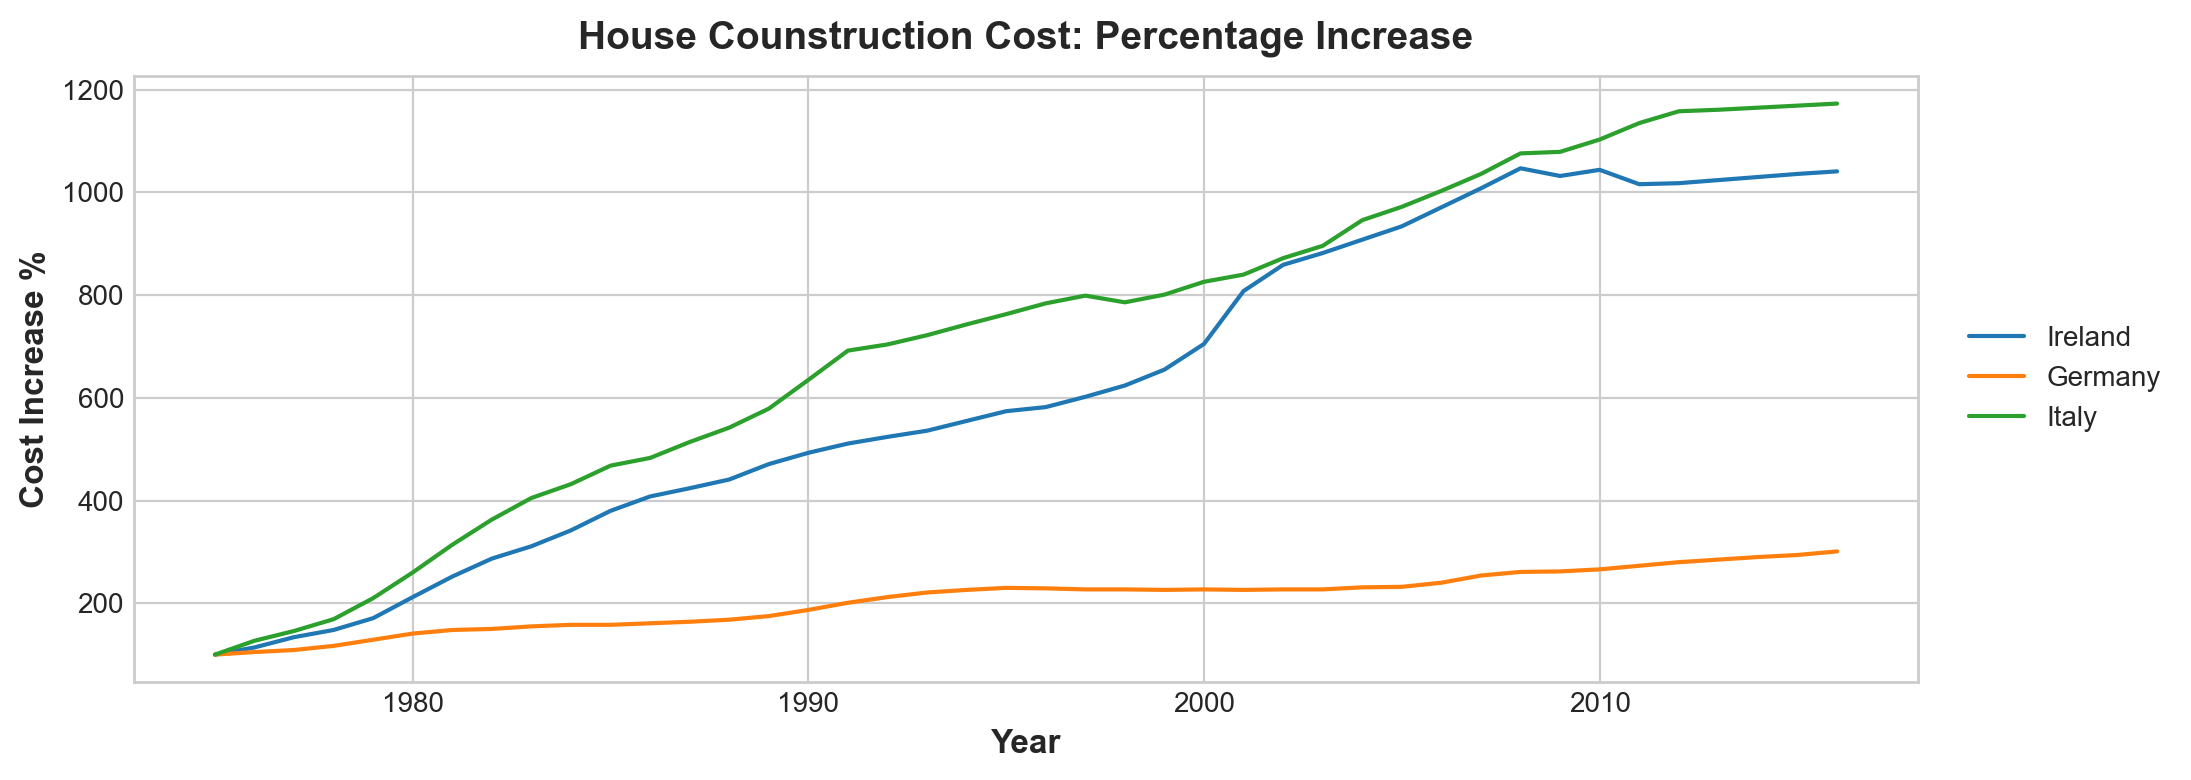

In [64]:
#PLOTTING GRAPH 

#Groupby to group the data by ages and summarize values of them
#df_groupby = df_all_CSV.groupby('Date')['Adults Aged 18-24', 'Adults Aged 25-44', 'Adults Aged 45-64', 'Adults Aged 65+'].sum().reset_index();

# create figure and axis objects with subplots()
fig, ax = plt.subplots();

# Ploting graph lines
ax.plot(df_All_Countries_Construction_Cost['Year'], df_All_Countries_Construction_Cost['Ireland_Construction_Cost'], label='Ireland');  # Plot first line of data.
ax.plot(df_All_Countries_Construction_Cost['Year'], df_All_Countries_Construction_Cost['Germany_Construction_Cost'], label='Germany');  # Plot second line of data
ax.plot(df_All_Countries_Construction_Cost['Year'], df_All_Countries_Construction_Cost['Italy_Construction_Cost'], label='Italy');  # Plot 3th line of data

ax.set_xlabel('Year');  # Add an x-label to the axes.
ax.set_ylabel('Cost Increase %');  # Add a y-label to the axes.
ax.set_title("House Counstruction Cost: Percentage Increase");  # Add a title to the axes.
ax.legend(loc="right", bbox_to_anchor=(1.15, 0.5)) # Better positioning the legend


In [87]:
import plotly.express as px

fig = px.scatter_geo(df_All_Countries_Construction_Cost_Geo, 
                    locations="Country_Code",
 # name of column indicating country-codes
                    size="Construction_Cost", 
 # name of column by which to size the bubble
                    hover_name="Country", 
# name of column to be displayed while hovering over the map
                    size_max=30, # parameter to scale all bubble size
                    scope='europe',
                    animation_frame="Year",
                    )
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'House Construction Cost',
    # set projection style for the plot
    geo = dict(projection={'type':'natural earth'}) # by default, projection type is set to 'equirectangular'
)
fig.show()

## Total Construction

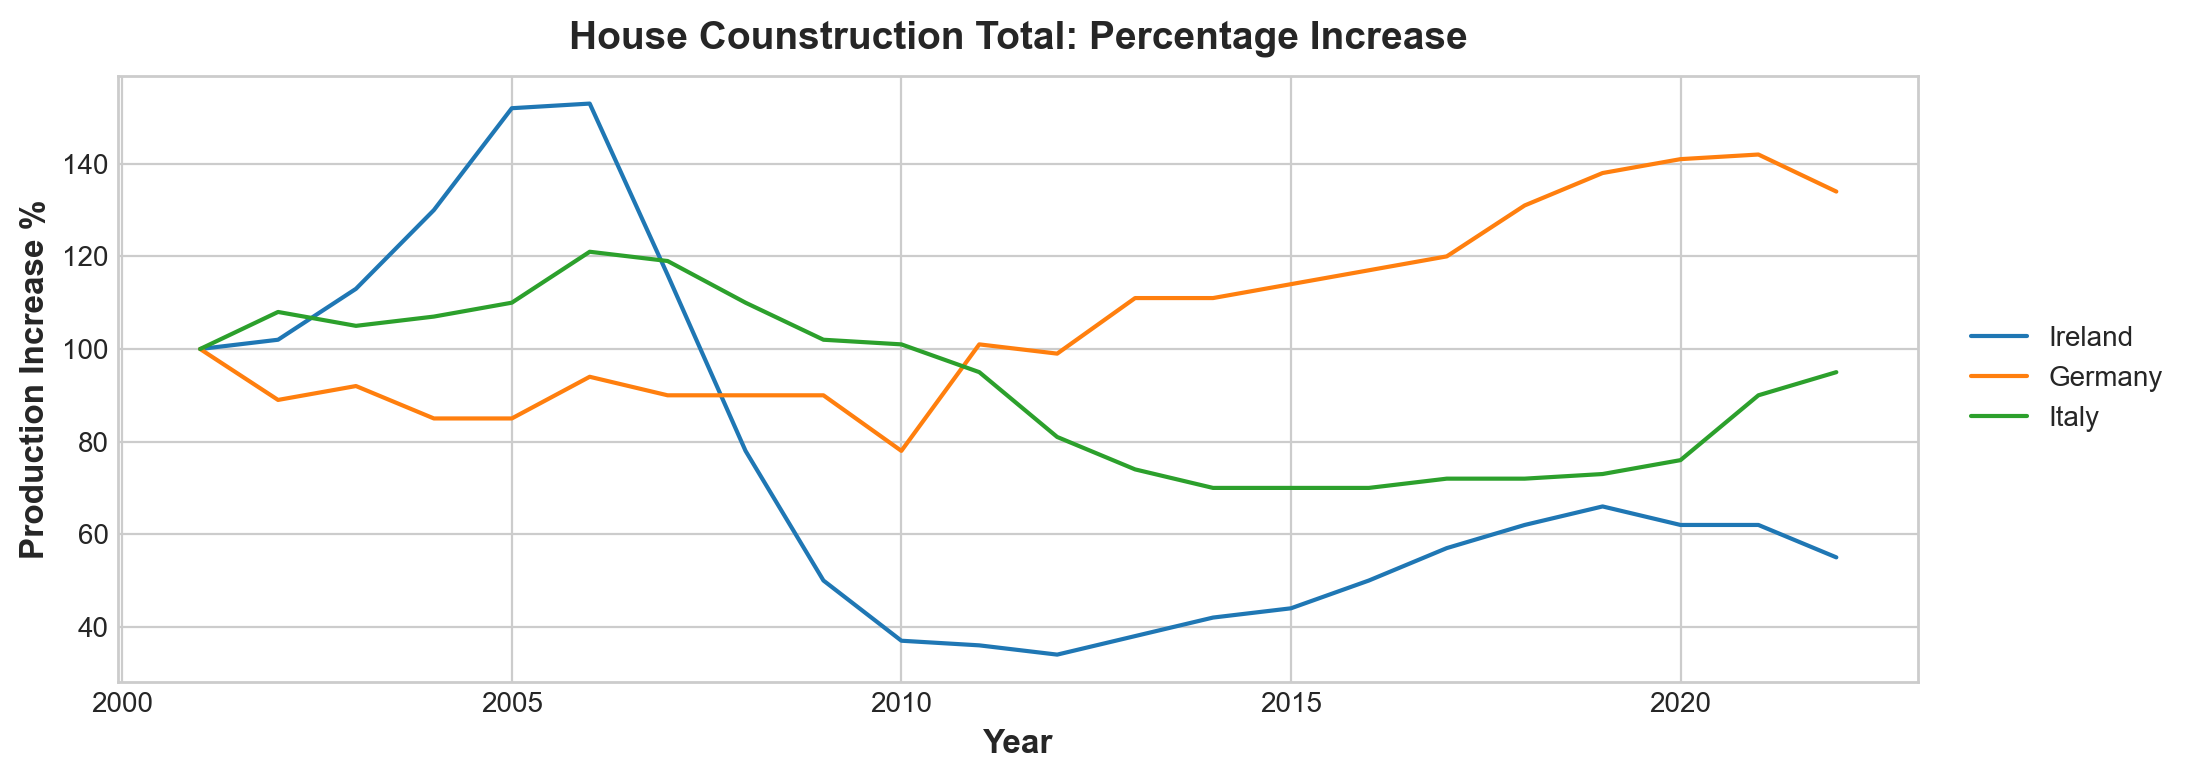

In [68]:
#PLOTTING GRAPH 

# create figure and axis objects with subplots()
fig, ax = plt.subplots();

# Ploting graph lines
ax.plot(df_All_Countries_Construction_Total['Year'], df_All_Countries_Construction_Total['Ireland_Construction_Total'], label='Ireland');  # Plot first line of data.
ax.plot(df_All_Countries_Construction_Total['Year'], df_All_Countries_Construction_Total['Germany_Construction_Total'], label='Germany');  # Plot second line of data
ax.plot(df_All_Countries_Construction_Total['Year'], df_All_Countries_Construction_Total['Italy_Construction_Total'], label='Italy');  # Plot 3th line of data

ax.set_xlabel('Year');  # Add an x-label to the axes.
ax.set_ylabel('Production Increase %');  # Add a y-label to the axes.
ax.set_title("House Counstruction Total: Percentage Increase");  # Add a title to the axes.
ax.legend(loc="right", bbox_to_anchor=(1.15, 0.5)) # Better positioning the legend

In [86]:
import plotly.express as px

fig = px.scatter_geo(df_All_Countries_Construction_Total_Geo, 
                    locations="Country_Code",
 # name of column indicating country-codes
                    size="Construction_Total", 
 # name of column by which to size the bubble
                    hover_name="Country", 
# name of column to be displayed while hovering over the map
                    size_max=30, # parameter to scale all bubble size
                    scope='europe',
                    animation_frame="Year",
                    )
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'House Construction Total',
    # set projection style for the plot
    geo = dict(projection={'type':'natural earth'}) # by default, projection type is set to 'equirectangular'
)
fig.show()

## Construction Employment

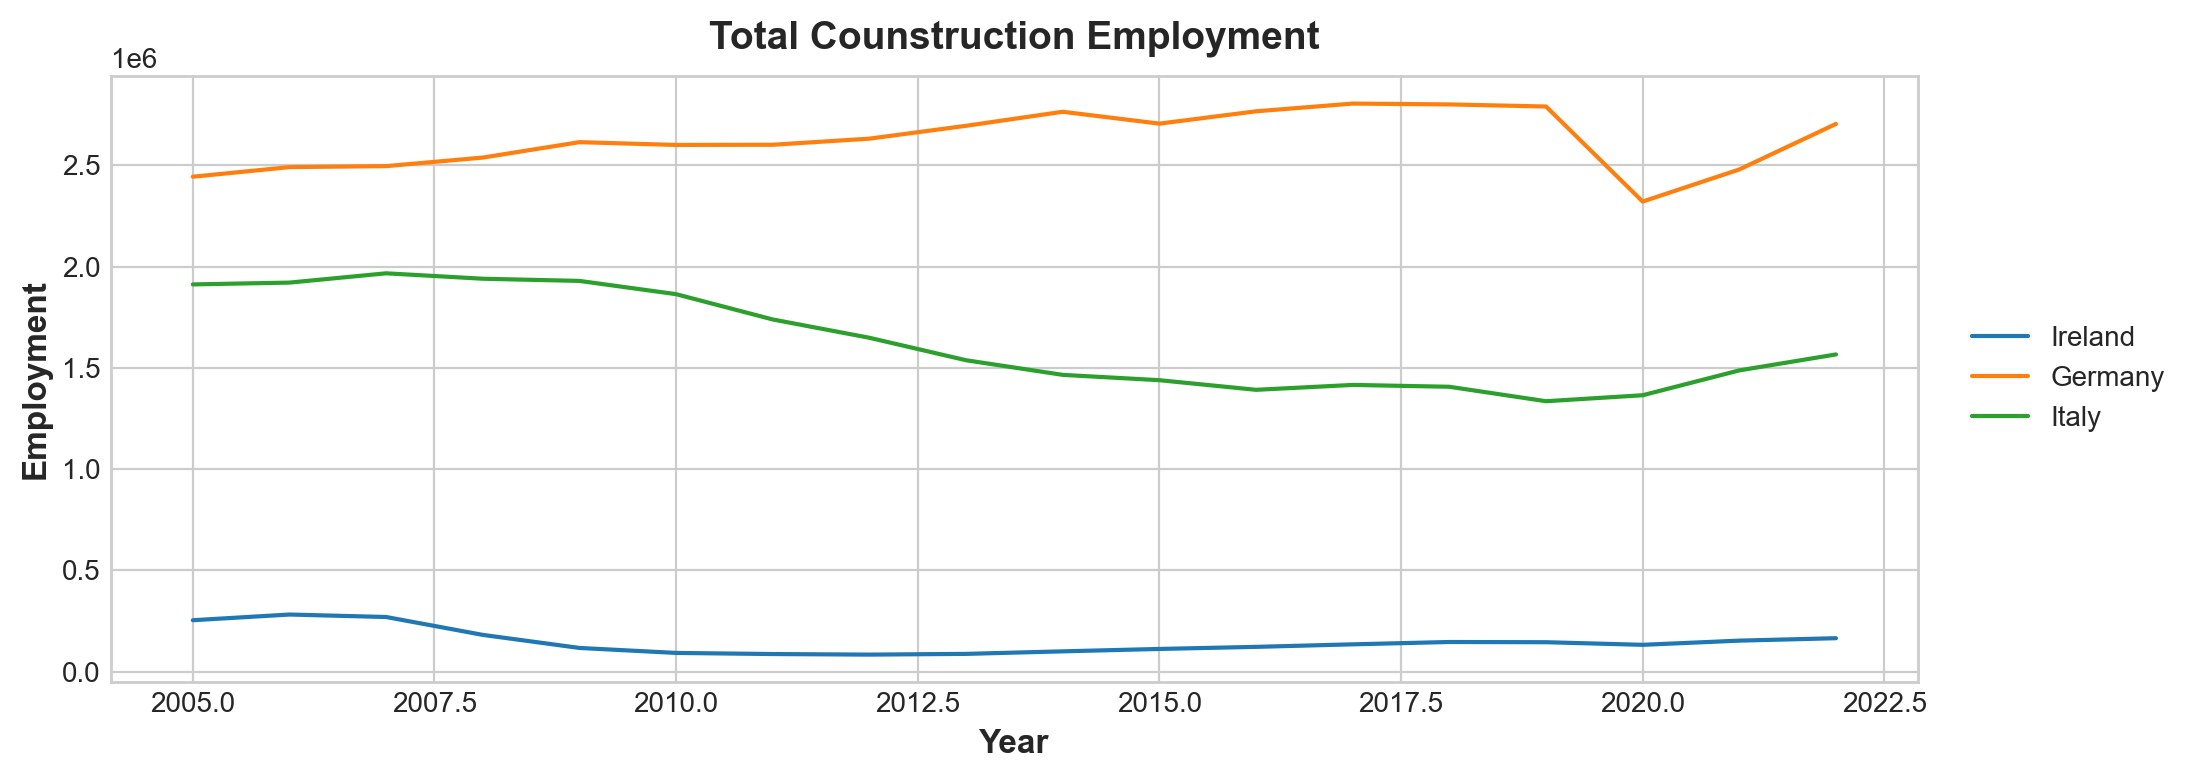

In [70]:
#PLOTTING GRAPH 

# create figure and axis objects with subplots()
fig, ax = plt.subplots();

# Ploting graph lines
ax.plot(df_All_Countries_Construction_Employment['Year'], df_All_Countries_Construction_Employment['Ireland_Construction_Employment'], label='Ireland');  # Plot first line of data.
ax.plot(df_All_Countries_Construction_Employment['Year'], df_All_Countries_Construction_Employment['Germany_Construction_Employment'], label='Germany');  # Plot second line of data
ax.plot(df_All_Countries_Construction_Employment['Year'], df_All_Countries_Construction_Employment['Italy_Construction_Employment'], label='Italy');  # Plot 3th line of data

ax.set_xlabel('Year');  # Add an x-label to the axes.
ax.set_ylabel('Employment');  # Add a y-label to the axes.
ax.set_title("Total Counstruction Employment");  # Add a title to the axes.
ax.legend(loc="right", bbox_to_anchor=(1.15, 0.5)) # Better positioning the legend

In [88]:
import plotly.express as px

fig = px.scatter_geo(df_All_Countries_Construction_Employment_Geo, 
                    locations="Country_Code",
 # name of column indicating country-codes
                    size="Construction_Employment", 
 # name of column by which to size the bubble
                    hover_name="Country", 
# name of column to be displayed while hovering over the map
                    size_max=30, # parameter to scale all bubble size
                    scope='europe',
                    animation_frame="Year",
                    )
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'Construction Employment',
    # set projection style for the plot
    geo = dict(projection={'type':'natural earth'}) # by default, projection type is set to 'equirectangular'
)
fig.show()

### Construction Employment - Per Population

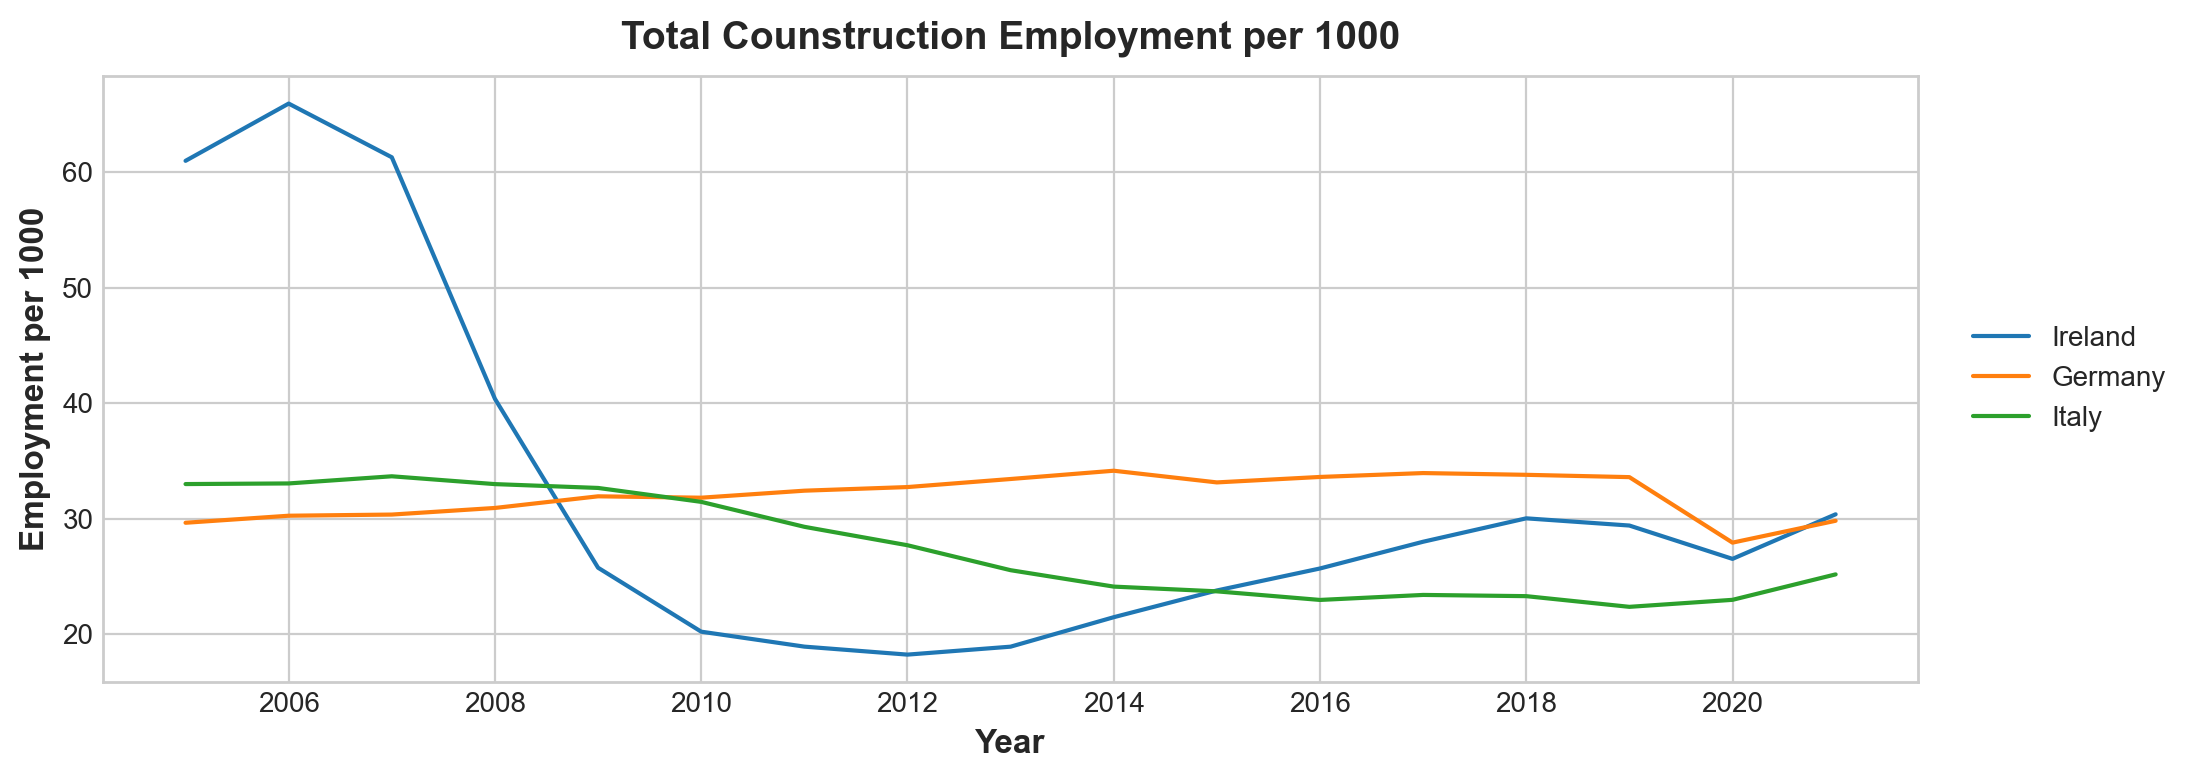

In [71]:
#Application of the per 1000 rate = Employment / Population * 1000
#RPO = E/P*1000

#df_All_Countries_Population_Total

#PLOTTING GRAPH 

# create figure and axis objects with subplots()
fig, ax = plt.subplots();

# Ploting graph lines
ax.plot(df_All_Countries_Construction_Employment['Year'], df_All_Countries_Construction_Employment['Ireland_Construction_Employment'] / df_All_Countries_Population_Total['Ireland_Population_Total'] * 1000, label='Ireland');  # Plot first line of data.
ax.plot(df_All_Countries_Construction_Employment['Year'], df_All_Countries_Construction_Employment['Germany_Construction_Employment'] / df_All_Countries_Population_Total['Germany_Population_Total'] * 1000, label='Germany');  # Plot second line of data
ax.plot(df_All_Countries_Construction_Employment['Year'], df_All_Countries_Construction_Employment['Italy_Construction_Employment'] / df_All_Countries_Population_Total['Italy_Population_Total'] * 1000, label='Italy');  # Plot 3th line of data

#ax.plot(df_All_Countries_Construction_Employment['Year'], df_All_Countries_Construction_Employment['Ireland_Construction_Employment'], label='Ireland');  # Plot first line of data.
#ax.plot(df_All_Countries_Construction_Employment['Year'], df_All_Countries_Construction_Employment['Germany_Construction_Employment'], label='Germany');  # Plot second line of data
#ax.plot(df_All_Countries_Construction_Employment['Year'], df_All_Countries_Construction_Employment['Italy_Construction_Employment'], label='Italy');  # Plot 3th line of data

ax.set_xlabel('Year');  # Add an x-label to the axes.
ax.set_ylabel('Employment per 1000');  # Add a y-label to the axes.
ax.set_title("Total Counstruction Employment per 1000");  # Add a title to the axes.
ax.legend(loc="right", bbox_to_anchor=(1.15, 0.5)) # Better positioning the legend

### Contruction Employment per Active Population 

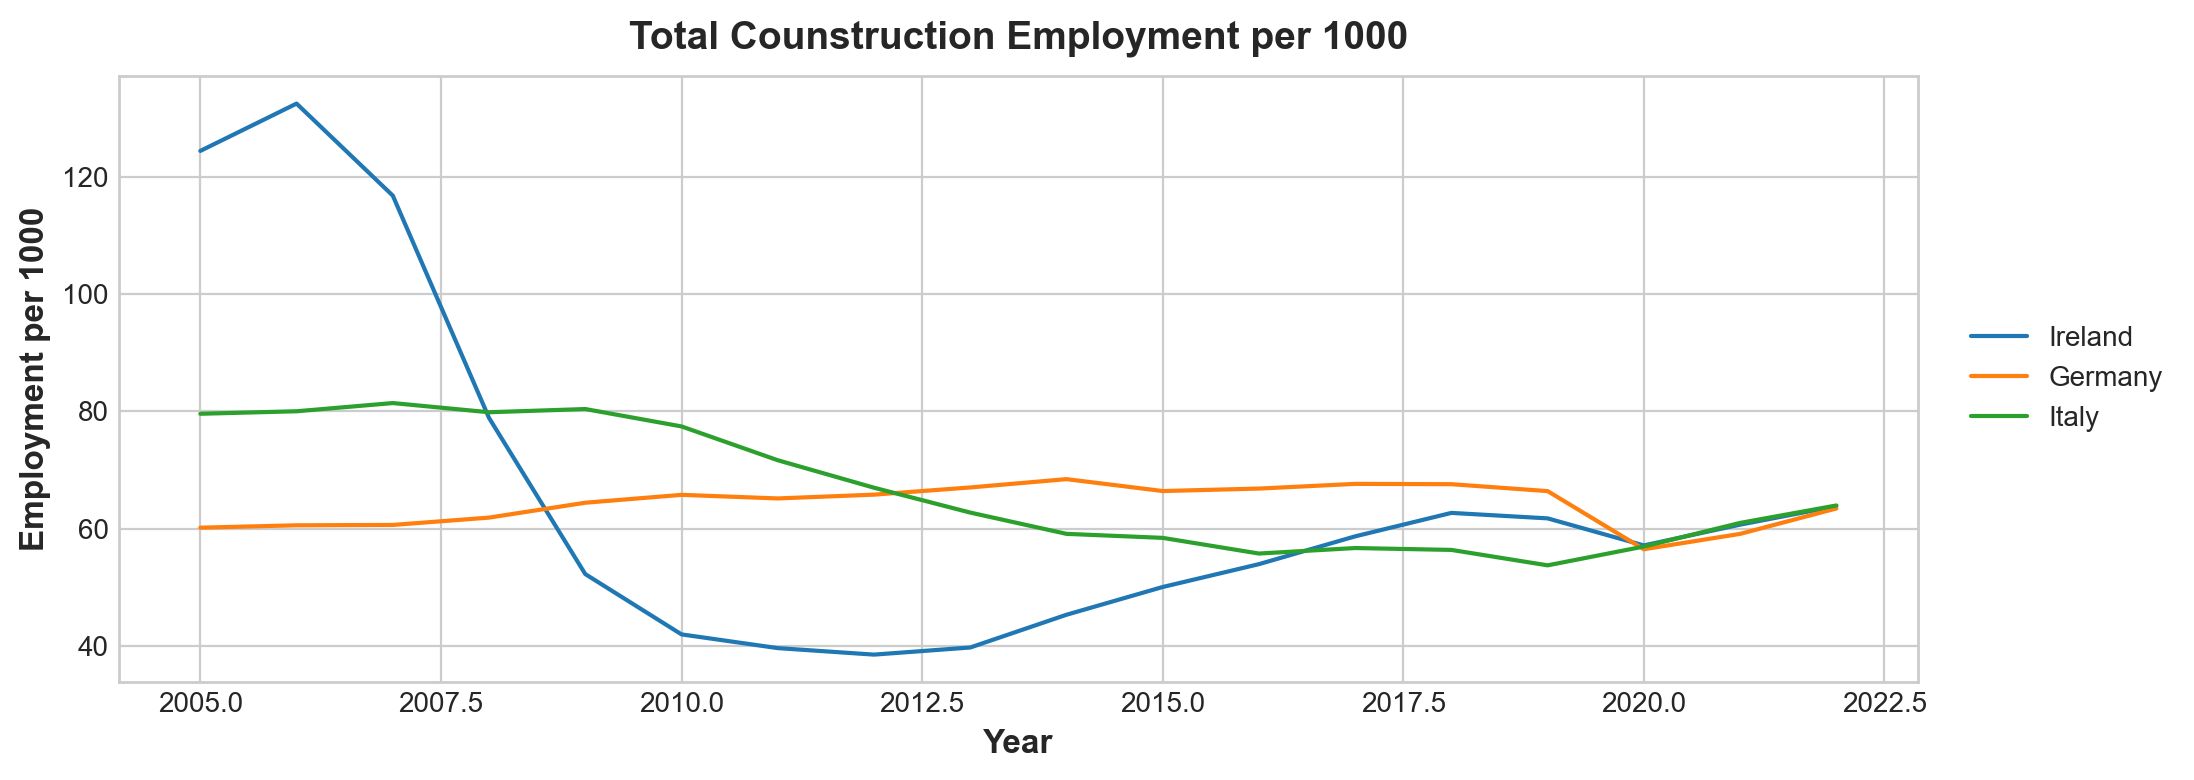

In [72]:
#Application of the per 1000 rate = Employment / Population * 1000
#RPO = E/P*1000

#df_All_Countries_Population_Total

#PLOTTING GRAPH 

# create figure and axis objects with subplots()
fig, ax = plt.subplots();

# Ploting graph lines
ax.plot(df_All_Countries_Construction_Employment['Year'], df_All_Countries_Construction_Employment['Ireland_Construction_Employment'] / df_All_Countries_Population_Total_Active['Ireland_Population_Total_Active'] * 1000, label='Ireland');  # Plot first line of data.
ax.plot(df_All_Countries_Construction_Employment['Year'], df_All_Countries_Construction_Employment['Germany_Construction_Employment'] / df_All_Countries_Population_Total_Active['Germany_Population_Total_Active'] * 1000, label='Germany');  # Plot second line of data
ax.plot(df_All_Countries_Construction_Employment['Year'], df_All_Countries_Construction_Employment['Italy_Construction_Employment'] / df_All_Countries_Population_Total_Active['Italy_Population_Total_Active'] * 1000, label='Italy');  # Plot 3th line of data

#ax.plot(df_All_Countries_Construction_Employment['Year'], df_All_Countries_Construction_Employment['Ireland_Construction_Employment'], label='Ireland');  # Plot first line of data.
#ax.plot(df_All_Countries_Construction_Employment['Year'], df_All_Countries_Construction_Employment['Germany_Construction_Employment'], label='Germany');  # Plot second line of data
#ax.plot(df_All_Countries_Construction_Employment['Year'], df_All_Countries_Construction_Employment['Italy_Construction_Employment'], label='Italy');  # Plot 3th line of data

ax.set_xlabel('Year');  # Add an x-label to the axes.
ax.set_ylabel('Employment per 1000');  # Add a y-label to the axes.
ax.set_title("Total Counstruction Employment per 1000");  # Add a title to the axes.
ax.legend(loc="right", bbox_to_anchor=(1.15, 0.5)) # Better positioning the legend

# Statistical Analysis

# Machine Learning